<a href="https://colab.research.google.com/github/Fatai-soliu/python/blob/main/MLDM_Week_3_Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#Import dataset

data = pd.read_csv("/content/drive/MyDrive/Datasets/marketbasket.csv")

In [9]:
data.head()

,apples,banana,coke,turkey,bourbon,ice_cream,baguette,soda,choclate,cracker,cosmetics,avocado,artichoke,sardines
0,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes
1,No,No,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No
2,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
3,No,No,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes
4,No,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No


In [10]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5953 sha256=918c41d73184c71396f0949e9bac8515023bcbedcc1d9f0c19d12ae5ac5d6cdf
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [20]:
#Import other Libraries
from apyori import apriori
import ARutils

In [22]:
#Show the last 10 rows in dataset
data.tail(10)

,apples,banana,coke,turkey,bourbon,ice_cream,baguette,soda,choclate,cracker,cosmetics,avocado,artichoke,sardines
990,Yes,No,Yes,No,No,No,No,No,Yes,Yes,No,No,No,Yes
991,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes
992,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
993,No,No,No,No,Yes,No,No,Yes,Yes,Yes,Yes,No,No,Yes
994,No,Yes,No,No,No,No,No,No,Yes,Yes,Yes,Yes,No,No
995,No,No,No,No,No,No,No,No,No,No,No,No,No,No
996,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No
997,No,Yes,Yes,Yes,Yes,No,No,Yes,No,No,Yes,No,Yes,Yes
998,Yes,Yes,No,No,Yes,No,No,No,Yes,Yes,No,No,Yes,Yes
999,No,No,No,No,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes


In [24]:
#Describe the dataset

data.describe()

,apples,banana,coke,turkey,bourbon,ice_cream,baguette,soda,choclate,cracker,cosmetics,avocado,artichoke,sardines
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
freq,946,637,720,851,558,958,721,766,643,619,536,510,678,543


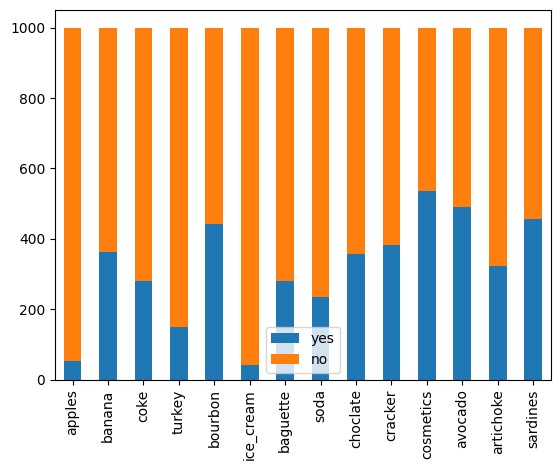

In [31]:
#Plot to explore the dataset

yes = (data == 'Yes').sum()
no = (data == 'No').sum()
purchased = pd.concat([yes,no],axis=1,keys=['yes','no'])
ax = purchased.plot.bar(stacked=True)
plt.show()

In [32]:
## A small sample for Apriori Algorithm in Python

#Creating sample Transaction

transactions = [
    ['Milk', 'Bread', 'Saffron'],
    ['Milk', 'Saffron'],
    ['Bread', 'Saffron', 'Wafer'],
    ['Bread', 'Wafer']
]

In [33]:
transactions

[['Milk', 'Bread', 'Saffron'],
 ['Milk', 'Saffron'],
 ['Bread', 'Saffron', 'Wafer'],
 ['Bread', 'Wafer']]

In [34]:
type(transactions)

list

In [35]:
#Generating association rules
Rules = list(apriori(transactions, min_support=0.2, min_confidence=0.5))

In [36]:
#Extract the created rules
associationRule = ARutils.extract(Rules)
rules_df = pd.DataFrame(data = associationRule, columns = ['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])
rules_df

,LHS,RHS,Support,Confidence,Lift
0,[],[Bread],0.75,0.750000,1.000000
1,[],[Milk],0.50,0.500000,1.000000
2,[],[Saffron],0.75,0.750000,1.000000
3,[],[Wafer],0.50,0.500000,1.000000
4,[Milk],[Bread],0.25,0.500000,0.666667
5,[],"[Saffron, Bread]",0.50,0.500000,1.000000
6,[Bread],[Saffron],0.50,0.666667,0.888889
7,[Saffron],[Bread],0.50,0.666667,0.888889
8,[],"[Wafer, Bread]",0.50,0.500000,1.000000
9,[Bread],[Wafer],0.50,0.666667,1.333333


In [40]:
#View the rules generated using the ARutils inspect

ARutils.inspect(associationRule)

The number of associated rules: 23
LHS: [] --> RHS:['Bread'], support: 0.75, confidence: 0.75, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Milk'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Saffron'], support: 0.75, confidence: 0.75, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Wafer'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Milk'] --> RHS:['Bread'], support: 0.25, confidence: 0.50, lift: 0.67
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Saffron', 'Bread'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Bread'] --> RHS:['Saffron'],

In [43]:
# Pre process the main dataset
transactions = ARutils.data_prepare(data)

In [46]:
#Applying the apriori rule on the main marketbasket dataset
#Define the rules first
Rules = list(apriori(transactions, min_support=0.02, min_confidence=0.2))

#Extract the created rules
associationRule = ARutils.extract(Rules)
rules_df = pd.DataFrame(data = associationRule, columns = ['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])
len(rules_df)

27348

In [47]:
rules_df

,LHS,RHS,Support,Confidence,Lift
0,[],[artichoke],0.322,0.322000,1.000000
1,[],[avocado],0.490,0.490000,1.000000
2,[],[baguette],0.279,0.279000,1.000000
3,[],[banana],0.363,0.363000,1.000000
4,[],[bourbon],0.442,0.442000,1.000000
...,...,...,...,...,...
27343,"[bourbon, baguette, choclate, soda, coke, sard...",[cracker],0.021,0.840000,2.204724
27344,"[bourbon, baguette, cracker, choclate, soda, s...",[coke],0.021,1.000000,3.571429
27345,"[bourbon, cracker, baguette, soda, coke, sardi...",[choclate],0.021,0.954545,2.673797
27346,"[cracker, baguette, choclate, soda, coke, sard...",[bourbon],0.021,1.000000,2.262443


In [48]:
#Let's look at the 10 rules with the highest lift

rules_df.nlargest(10, "Lift")

,LHS,RHS,Support,Confidence,Lift
26986,"[bourbon, choclate, baguette, coke]","[soda, turkey, cracker, banana]",0.022,0.400000,16.666667
27024,"[soda, banana, cracker, turkey]","[bourbon, choclate, baguette, coke]",0.022,0.916667,16.666667
26990,"[bourbon, cracker, baguette, coke]","[soda, choclate, turkey, banana]",0.022,0.423077,16.272189
27020,"[soda, choclate, banana, turkey]","[bourbon, baguette, cracker, coke]",0.022,0.846154,16.272189
27212,"[sardines, cracker, baguette, coke]","[bourbon, choclate, turkey, soda]",0.021,0.552632,16.253870
27230,"[bourbon, choclate, turkey, soda]","[sardines, cracker, coke, baguette]",0.021,0.617647,16.253870
27013,"[bourbon, banana, cracker, turkey]","[soda, choclate, baguette, coke]",0.022,0.647059,16.176471
26997,"[soda, choclate, baguette, coke]","[bourbon, turkey, cracker, banana]",0.022,0.550000,16.176471
27176,"[soda, choclate, turkey]","[bourbon, cracker, baguette, coke, sardines]",0.021,0.552632,15.789474
27266,"[bourbon, cracker, baguette, coke, sardines]","[soda, choclate, turkey]",0.021,0.600000,15.789474


In [49]:
#Let's look at the 10 rules with the highest Confidence and Support

rules_df.nlargest(10, ['Support', 'Confidence'])

,LHS,RHS,Support,Confidence,Lift
7,[],[cosmetics],0.536,0.536000,1.000000
1,[],[avocado],0.490,0.490000,1.000000
9,[],[sardines],0.457,0.457000,1.000000
4,[],[bourbon],0.442,0.442000,1.000000
8,[],[cracker],0.381,0.381000,1.000000
3,[],[banana],0.363,0.363000,1.000000
5,[],[choclate],0.357,0.357000,1.000000
56,[avocado],[cosmetics],0.356,0.726531,1.355468
57,[cosmetics],[avocado],0.356,0.664179,1.355468
55,[],"[avocado, cosmetics]",0.356,0.356000,1.000000


In [51]:
#Let's look at the 10 rules with the highest Confidence

rules_df.nlargest(10, 'Confidence')

,LHS,RHS,Support,Confidence,Lift
144,[turkey],[coke],0.149,1.0,3.571429
209,"[turkey, apples]",[coke],0.020,1.0,3.571429
363,"[artichoke, turkey]",[coke],0.049,1.0,3.571429
551,"[turkey, avocado]",[coke],0.068,1.0,3.571429
726,"[turkey, baguette]",[coke],0.097,1.0,3.571429
860,"[turkey, banana]",[coke],0.070,1.0,3.571429
965,"[bourbon, turkey]",[coke],0.092,1.0,3.571429
1038,"[choclate, turkey]",[coke],0.083,1.0,3.571429
1058,"[choclate, ice_cream]",[cracker],0.023,1.0,2.624672
1104,"[turkey, cosmetics]",[coke],0.074,1.0,3.571429


In [52]:
#Let's look at the 10 rules with the highest Support

rules_df.nlargest(10, 'Support')

,LHS,RHS,Support,Confidence,Lift
7,[],[cosmetics],0.536,0.536000,1.000000
1,[],[avocado],0.490,0.490000,1.000000
9,[],[sardines],0.457,0.457000,1.000000
4,[],[bourbon],0.442,0.442000,1.000000
8,[],[cracker],0.381,0.381000,1.000000
3,[],[banana],0.363,0.363000,1.000000
5,[],[choclate],0.357,0.357000,1.000000
55,[],"[avocado, cosmetics]",0.356,0.356000,1.000000
56,[avocado],[cosmetics],0.356,0.726531,1.355468
57,[cosmetics],[avocado],0.356,0.664179,1.355468


In [55]:
#Using a lambda function to filter out those
#rules which have an empty list in the LHS column of the Data Frame.

#lambda arguments : expression

rules_df[rules_df['LHS'].apply(lambda x: len(x) > 0)].nlargest(10, 'Support')

,LHS,RHS,Support,Confidence,Lift
56,[avocado],[cosmetics],0.356,0.726531,1.355468
57,[cosmetics],[avocado],0.356,0.664179,1.355468
126,[choclate],[cracker],0.321,0.899160,2.359999
127,[cracker],[choclate],0.321,0.842520,2.359999
115,[bourbon],[sardines],0.297,0.671946,1.470341
116,[sardines],[bourbon],0.297,0.649891,1.470341
149,[cosmetics],[sardines],0.238,0.444030,0.971619
150,[sardines],[cosmetics],0.238,0.520788,0.971619
108,[bourbon],[cosmetics],0.231,0.522624,0.975046
109,[cosmetics],[bourbon],0.231,0.430970,0.975046


In [56]:
#Try out another lambda function with nlargest and Dataframe
#Here, I want to get top 10 confidence for rules where their RHS is less than or equal to 1

rules_df[rules_df['RHS'].apply(lambda x: len(x) <= 1)].nlargest(10, 'Confidence')

,LHS,RHS,Support,Confidence,Lift
144,[turkey],[coke],0.149,1.0,3.571429
209,"[turkey, apples]",[coke],0.020,1.0,3.571429
363,"[artichoke, turkey]",[coke],0.049,1.0,3.571429
551,"[turkey, avocado]",[coke],0.068,1.0,3.571429
726,"[turkey, baguette]",[coke],0.097,1.0,3.571429
860,"[turkey, banana]",[coke],0.070,1.0,3.571429
965,"[bourbon, turkey]",[coke],0.092,1.0,3.571429
1038,"[choclate, turkey]",[coke],0.083,1.0,3.571429
1058,"[choclate, ice_cream]",[cracker],0.023,1.0,2.624672
1104,"[turkey, cosmetics]",[coke],0.074,1.0,3.571429
